# Lab 7

Dimensionality Reduction
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. 
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

Parameters	Number
Classes	10
Samples per class	~7000 samples per class
Samples total	70000
Dimensionality	784
Features	integers values from 0 to 255

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

# #Download and load data

In [2]:
import gzip
f = gzip.open('/Users/charlesraymond/Downloads/train-images-idx3-ubyte.gz', 'r')

image_size = 28
num_images = 60000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

## Visualize
  -Shape of data and targets
  #-Plot an image

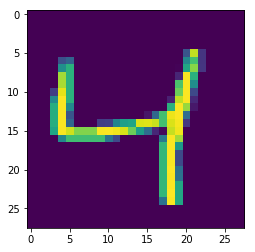

In [3]:
image = np.asarray(data[2]).squeeze()
plt.imshow(image)
plt.show()

In [4]:
data.shape
data = data.reshape(60000, 784)

# Standardize the data

In [5]:
mu = image.mean(axis = 0)
mu_zero = image - mu
#eigenvalues and vector
values, vectors = np.linalg.eig(np.matmul(mu_zero.T, mu_zero))

# Make an instance of PCA that explains 95% of variance


In [6]:
pca = PCA(.95)

# Reduce the dimensionality of your data
Show the number of principal components

In [7]:
pca = pca.fit(image)
X_pca = pca.transform(image)
print("Original shape:   ", image.shape,"transformed shape:", X_pca.shape)
print(pca.explained_variance_ratio_)

Original shape:    (28, 28) transformed shape: (28, 5)
[0.40101492 0.29860097 0.14795628 0.07599837 0.04414206]


# Plot original image next to approximated image

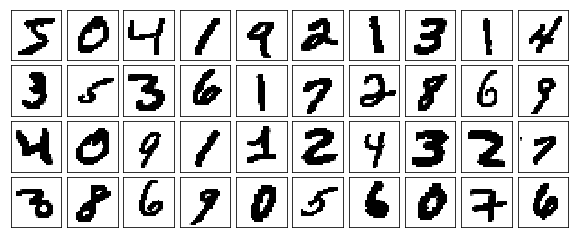

In [8]:
#X_image=plt.imshow(pca.data[0].reshape(8,8),cmap=plt.get_cmap('gray'))
#plt.imshow(X_pca)
#plt.show()
#image = np.asarray(data[2]).squeeze()
#plt.imshow(image)
#plt.show()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28,28),cmap='binary', interpolation='nearest',clim=(0, 16))
plot_digits(data)
plt.show()



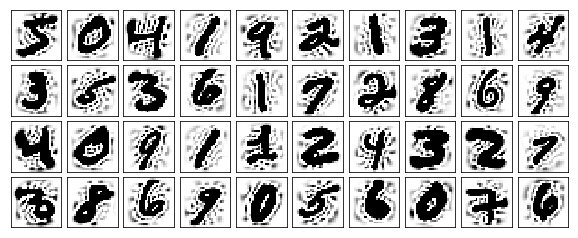

In [9]:
pca = PCA(0.95).fit(data)
pca.n_components_

components = pca.transform(data)
filtered = pca.inverse_transform(components)
plot_digits(filtered)
plt.show()

# Graph of Explained Variance vs Number of Principal Components

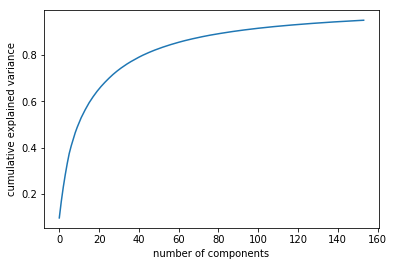

In [10]:
pca = PCA(.95).fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components'); plt.ylabel('cumulative explained variance');
plt.show()

##### Logistic Regression
 - We want to predict if an image is a 0
 - First reorganize the target data
 - It currently shows what number each image is
 - Change this to whether or not the image is a zero
 - Split data into train/test
 - Use PCA on the images
 - Train a logistic model on the transformed data (output of PCA)
 - Train a logistic model on the regular data
 - Report which model performs better
 - Find the best number of principal components for this task

In [11]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

Using TensorFlow backend.


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [12]:
from sklearn.linear_model import LogisticRegression
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

pca = PCA(0.95).fit(x_train)
transformX_train = pca.fit_transform(x_train)
transformX_test = pca.transform(x_test)

In [13]:
y_train = y_train == 0
y_test = y_test == 0
logReg = LogisticRegression()
transformed = logReg.fit(transformX_train, y_train)
train = logReg.fit(x_train, y_train)
test = logReg.fit(x_test, y_test)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
pred = logReg.predict(transformX_test)
scores = logReg.score(transformX_test, y_test)
transformed = logReg.fit(x_train, y_train)
pred2 = logReg.predict(x_train)
scores2 = logReg.score(x_test, y_test)

ValueError: X has 154 features per sample; expecting 784

In [ ]:
# Matt Newerem helped me with the logistical regression part of the lab.
# I however kept receiving a 'FutureWarning' that I could not figure out

# t-SNE

In [62]:
#t-SNE is an algorithm that helps visualize high dimension data sets in low dimensions such as 2D or 3D. 
# It was created by Laurens van der Maaten and Geoffrey Hinton. There are two stages of the algorithm
# The first creates a probability distribution where similar features have a high probability of being picker
# where as not similar features have a lower probability. The next stage the t-SNE then creates a similar
# probability distribution but now in a low-dimensional map. This time, however, it minimizes the Kullback- 
# Leinbler divergence between the two distributions with respect to the locations of the points in the map.

